## IMPOTANDO LIBS

In [232]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os 

## EXPLORAÇÃO DOS DADOS

### ANÁLISES DESCRITIVAS

In [233]:
# Conectando com o db
db_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data', 'ML_db.db'))
conn = sqlite3.connect(db_path)
# Retornando dado sem um df 
df = pd.read_sql_query("SELECT * FROM mercadolivre_veiculos", conn)
df.sample(5)

,marca,modelo,valor,ano,KM,tipo_combustivel,transmissao,motor,ar_condicionado,cor,portas,direcao,vidros_eletricos,local,uf,link,data_coleta
5805,jeep,Compass 2.0 16V DIESEL TRAILHAWK 4X4 AUTOMÁTICO,136620.0,2020.0,4806.0,diesel,Automatica,2.0,Sim,Cinza,4.0,Elétrica,Sim,Recife,PE,https://carro.mercadolivre.com.br/MLB-36921770...,2024-06-23 00:00:00
3352,hyundai,HB20S 1.0 COMFORT PLUS 12V FLEX 4P MANUAL,49890.0,2019.0,10000.0,flex,Manual,1.0,Sim,Branco,4.0,Hidráulica,Sim,Belo Horizonte,MG,https://carro.mercadolivre.com.br/MLB-48083674...,2024-06-23 00:00:00
552,volkswagen,Fox 1.0 MI 8V FLEX 4P MANUAL,39800.0,2014.0,11554.0,flex,Manual,1.0,Sim,Prateado,4.0,Hidráulica,Sim,Belo Horizonte,MG,https://carro.mercadolivre.com.br/MLB-37230252...,2024-06-23 00:00:00
7291,citroen,C4 Cactus 1.6 VTI 120 FLEX FEEL PACK EAT6,93000.0,2023.0,4200.0,flex,Automatica,1.6,Sim,Preto,4.0,Elétrica,Sim,Rio de Janeiro Zona Norte,RJ,https://carro.mercadolivre.com.br/MLB-37517325...,2024-06-23 00:00:00
4077,fiat,Argo DRIVE 1.0,54900.0,2020.0,8000.0,flex,Manual,1.0,Sim,Branco,4.0,Hidráulica,Sim,Ipiranga - Belo Horizonte,MG,https://carro.mercadolivre.com.br/MLB-37219045...,2024-06-23 00:00:00


In [234]:
df.columns

Index(['marca', 'modelo', 'valor', 'ano', 'KM', 'tipo_combustivel',
       'transmissao', 'motor', 'ar_condicionado', 'cor', 'portas', 'direcao',
       'vidros_eletricos', 'local', 'uf', 'link', 'data_coleta'],
      dtype='object')

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10486 entries, 0 to 10485
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marca             10486 non-null  object 
 1   modelo            10486 non-null  object 
 2   valor             10486 non-null  float64
 3   ano               10486 non-null  float64
 4   KM                10486 non-null  float64
 5   tipo_combustivel  10486 non-null  object 
 6   transmissao       10486 non-null  object 
 7   motor             10486 non-null  float64
 8   ar_condicionado   10486 non-null  object 
 9   cor               10486 non-null  object 
 10  portas            10486 non-null  float64
 11  direcao           10486 non-null  object 
 12  vidros_eletricos  10486 non-null  object 
 13  local             10486 non-null  object 
 14  uf                10486 non-null  object 
 15  link              10486 non-null  object 
 16  data_coleta       10486 non-null  object

In [236]:
df.describe().round()

,valor,ano,KM,motor,portas
count,10486.0,10486.0,10486.0,10486.0,10486.0
mean,93274.0,2018.0,9338.0,2.0,4.0
std,83911.0,4.0,36833.0,1.0,1.0
min,4000.0,1994.0,10.0,1.0,0.0
25%,51990.0,2016.0,4800.0,1.0,4.0
50%,73190.0,2019.0,6857.0,2.0,4.0
75%,107900.0,2022.0,10200.0,2.0,4.0
max,4250000.0,2025.0,999999.0,10.0,5.0


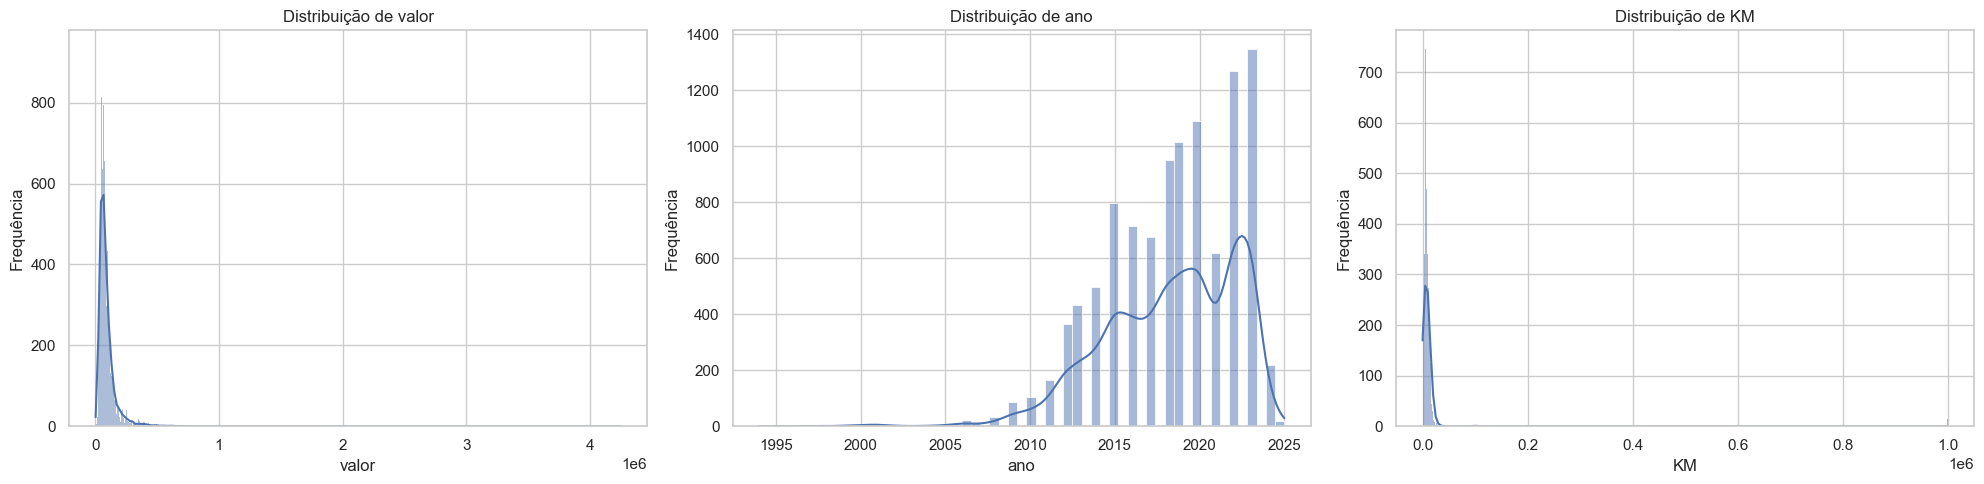

In [237]:
# ---- Analisando distribuição numerica
col_n = ['valor','ano','KM']

fig, axes = plt.subplots(1, len(col_n), figsize=(20, 5))

# Iterando sobre as colunas numéricas para criar histogramas
for i, col in enumerate(col_n):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

Os gráficos representam a distribuição de frequência de três variáveis numéricas: valor, ano e KM.

1. Distribuição de valor:

O histograma mostra que a distribuição do valor é assimétrica à direita, com uma maior concentração de dados nos valores mais baixos.

2. Distribuição de ano:

O histograma do ano mostra uma distribuição aproximadamente normal, com uma maior concentração de dados em torno do ano 2000.
A curva KDE confirma a normalidade, com uma curva simétrica em torno do ano 2000.
O ano mínimo é de aproximadamente 1970, enquanto o ano máximo é de aproximadamente 2020.

3. Distribuição de KM:

O histograma do KM mostra uma distribuição assimétrica à direita, com uma maior concentração de dados nos valores mais baixos.
Também podemos confirmar com a curva KDE a assimetria.
O KM mínimo é de aproximadamente 0, enquanto o KM máximo é de aproximadamente 1200.


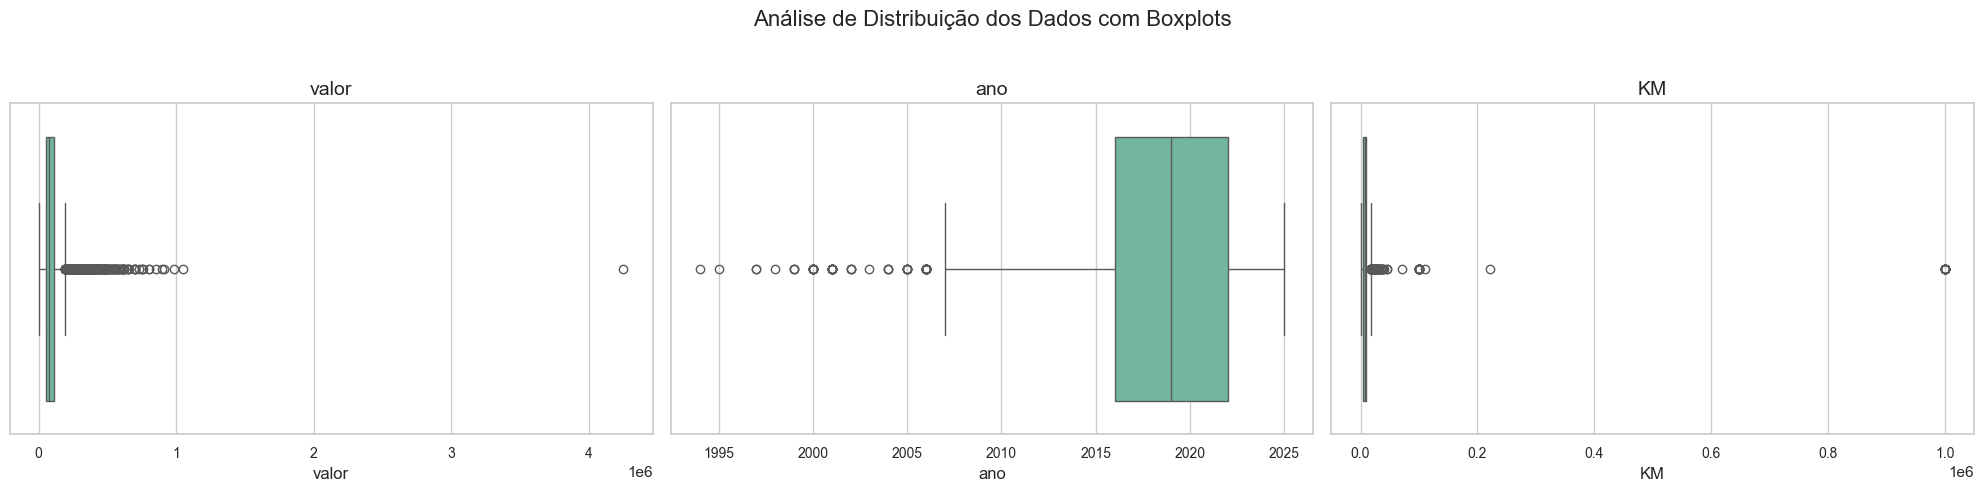

In [238]:
# ---- Analisando distribuição dos dados usando um BOXPLOT

# Criando a figura com subplots
fig, axes = plt.subplots(1, len(col_n), figsize=(20, 5))
# Definindo a paleta de cores
palette = sns.color_palette("Set2")

# Iterando sobre as colunas numéricas para criar boxplots horizontais
for i, col in enumerate(col_n):
    sns.boxplot(x=df[col], ax=axes[i], palette=palette)
    axes[i].set_title(f'{col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

# Adicionando um título principal à figura
plt.suptitle('Análise de Distribuição dos Dados com Boxplots', fontsize=16)

# Ajustando o layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Os gráficos representam Análise de Distribuição dos Dados com Boxplots: valor, ano e KM.

1. valor:

    O boxplot mostra uma mediana próxima a 0, com outliers que se estendem de aproximadamente 1 a pouco mais de 3. 
    Os valores nesse boxplot estão na faixa dos milhões. Portanto, a mediana próxima de 0 na verdade representa um valor de 500.000, e os outliers que vão até 4 representam valores na casa dos 4 milhões. 
    Valores esses que podem ser confirmado acima na analise que foi feita usando método `describe()`


2. ano

    O boxplot mostra uma distribuição com a mediana em torno do ano 2000. A ausência de outliers sugere que não há anos atípicos ou extremos no conjunto de dados com pouca variação entre eles.

3. KM:

    O boxplot tem uma mediana ligeiramente abaixo de 0,5. Os outliers são visíveis em ambos os lados, indicando a presença de valores de quilometragem muito baixos e muito altos em comparação com a maioria dos dados.


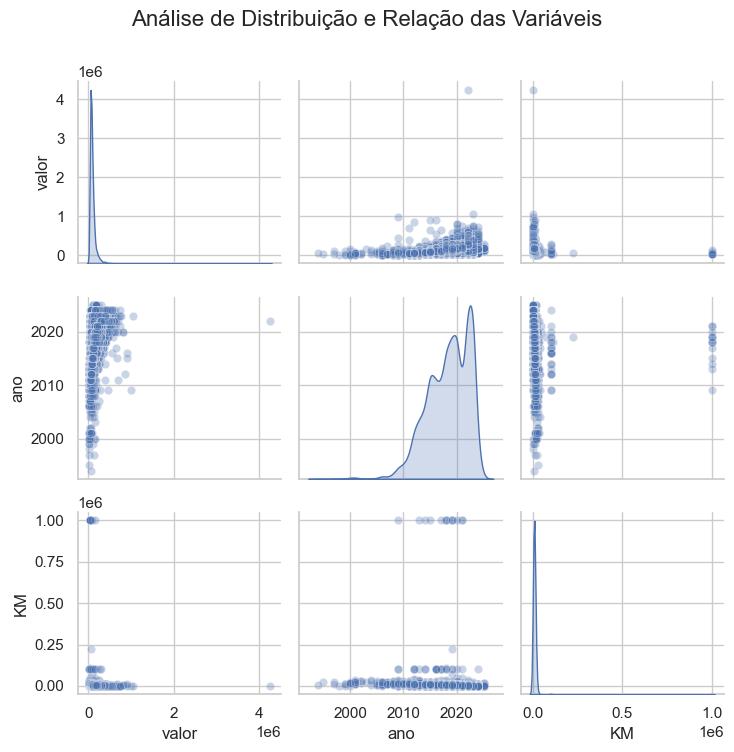

In [239]:
#------ Analisando a distribuição e relação de todas as variáveis.

# Criando o pairplot com seaborn
sns.pairplot(df[col_n], diag_kind='kde', plot_kws={'alpha':0.3}, diag_kws={'shade':True})
# Adicionando um título principal
plt.suptitle('Análise de Distribuição e Relação das Variáveis', y=1, fontsize=16)
# Ajustando o layout
plt.tight_layout()
plt.show()

 O que os gráficos de distribuição de todas as variáveis nos mostram?

* Valor vs. Ano: Este gráfico ilustra a relação entre o preço dos carros e o ano de fabricação. Em geral, observa-se que carros mais novos tendem a ter preços mais altos.

* Ano vs. Quilometragem (KM): Este gráfico mostra a relação entre o ano de fabricação e a quilometragem dos carros. Carros mais novos normalmente apresentam menor quilometragem, pois foram utilizados por menos tempo.

* Valor vs. Quilometragem (KM): Este gráfico apresenta como o preço dos carros se relaciona com a quilometragem. Carros com menos quilômetros rodados tendem a ser mais caros, indicando que a menor utilização aumenta o valor de mercado.

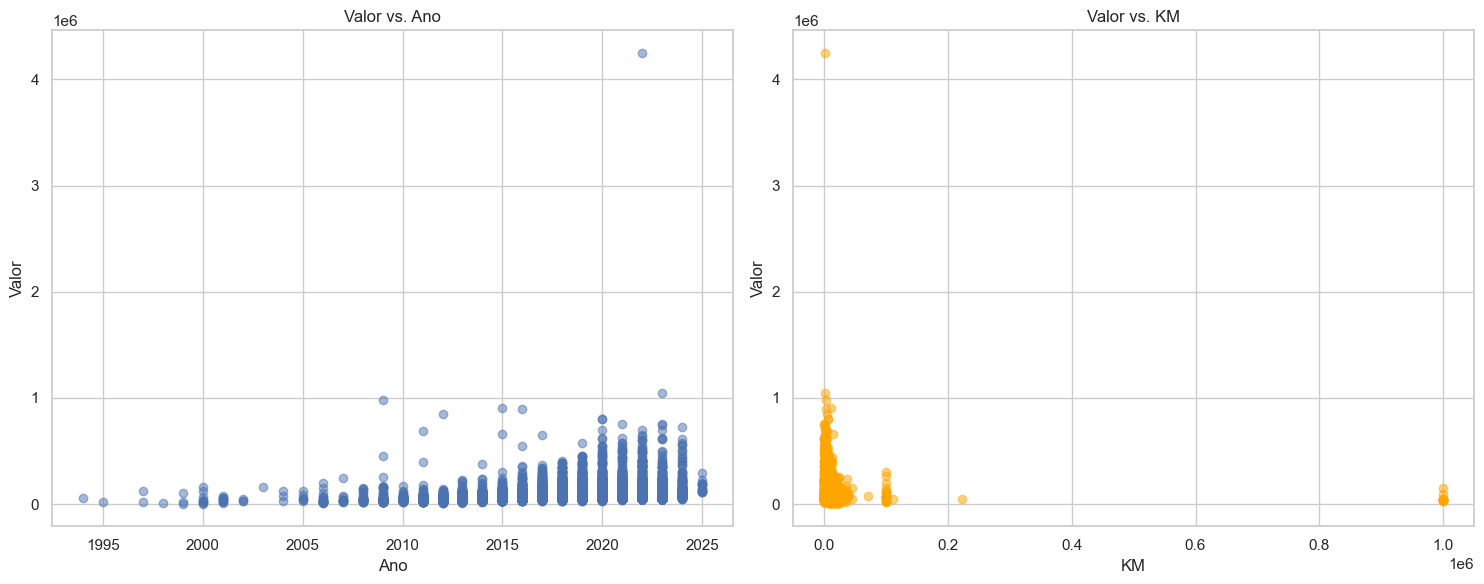

In [240]:
# Configuração da figura e subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))  # 1 linha, 2 colunas
# Subplot 1: Valor vs. Ano
ax[0].scatter(df['ano'], df['valor'], alpha=0.5)
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Valor')
ax[0].set_title('Valor vs. Ano')
# Subplot 2: Valor vs. KM
ax[1].scatter(df['KM'], df['valor'], alpha=0.5, color='orange')
ax[1].set_xlabel('KM')
ax[1].set_ylabel('Valor')
ax[1].set_title('Valor vs. KM')
# Ajustar layout
plt.tight_layout()
# Exibir gráfico
plt.show()

In [241]:
df.query("valor > 1000000")

,marca,modelo,valor,ano,KM,tipo_combustivel,transmissao,motor,ar_condicionado,cor,portas,direcao,vidros_eletricos,local,uf,link,data_coleta
8388,mercedes,Classe GLE Gle 53 Amg 3.0 L6 Gasolina 4matic+ ...,4250000.0,2022.0,2063.0,gasolina,Automatica,3.0,Sim,Preto,4.0,Elétrica,Não,Boa Vista - Curitiba,PR,https://carro.mercadolivre.com.br/MLB-37239856...,2024-06-23 00:00:00
8784,land,Rover Range Rover Sport 4.4 P530 GASOLINA FIRS...,1049900.0,2023.0,1300.0,gasolina,Automatica,4.4,Sim,Preto,4.0,Hidráulica,Sim,Florianópolis,SC,https://carro.mercadolivre.com.br/MLB-37333041...,2024-06-23 00:00:00


In [242]:
df.query("KM > 100000")

,marca,modelo,valor,ano,KM,tipo_combustivel,transmissao,motor,ar_condicionado,cor,portas,direcao,vidros_eletricos,local,uf,link,data_coleta
15,volkswagen,Voyage 1.6 MSI TOTALFLEX 4P MANUAL,39900.0,2019.0,999999.0,flex,Automatica,1.6,Sim,Prateado,4.0,Hidráulica,Sim,Rio de Janeiro Zona Norte,RJ,https://carro.mercadolivre.com.br/MLB-47040977...,2024-06-23 00:00:00
184,volkswagen,Gol 1.0 12V MPI TOTALFLEX 4P MANUAL,35990.0,2021.0,999999.0,flex,Manual,1.0,Sim,Prateado,4.0,Hidráulica,Sim,Rio de Janeiro Zona Norte,RJ,https://carro.mercadolivre.com.br/MLB-47880688...,2024-06-23 00:00:00
185,volkswagen,Polo 1.0 MPI TOTAL FLEX MANUAL,43990.0,2021.0,999999.0,flex,Manual,1.0,Sim,Preto,4.0,Hidráulica,Sim,Rio de Janeiro Zona Norte,RJ,https://carro.mercadolivre.com.br/MLB-47881198...,2024-06-23 00:00:00
1161,volkswagen,Space Cross 1.6 MI 8V FLEX 4P MANUAL,32900.0,2013.0,999999.0,flex,Manual,1.6,Sim,Branco,4.0,Hidráulica,Sim,Rio de Janeiro Zona Norte,RJ,https://carro.mercadolivre.com.br/MLB-47041363...,2024-06-23 00:00:00
1177,volkswagen,Fox 1.6 MI ROCK IN RIO 8V FLEX 4P MANUAL,32900.0,2014.0,999999.0,flex,Manual,1.6,Sim,Vermelho,4.0,Hidráulica,Sim,Rio de Janeiro Zona Norte,RJ,https://carro.mercadolivre.com.br/MLB-37005078...,2024-06-23 00:00:00
1186,volkswagen,Fox 1.6 MSI TRENDLINE 8V FLEX 4P MANUAL,35990.0,2015.0,999999.0,flex,Manual,1.6,Sim,Branco,4.0,Hidráulica,Sim,Rio de Janeiro Zona Norte,RJ,https://carro.mercadolivre.com.br/MLB-47875773...,2024-06-23 00:00:00
1585,volkswagen,Up! 1.0 MPI TAKE UP 12V FLEX 4P MANUAL,41900.0,2018.0,999999.0,flex,Manual,1.0,Sim,Preto,4.0,Hidráulica,Sim,Rio de Janeiro Zona Norte,RJ,https://carro.mercadolivre.com.br/MLB-47880944...,2024-06-23 00:00:00
1593,volkswagen,Gol 1.0 12V MPI TOTALFLEX CITY 4P MANUAL,44999.0,2018.0,111111.0,flex,Manual,1.0,Sim,Prateado,4.0,Hidráulica,Sim,São João de Meriti,RJ,https://carro.mercadolivre.com.br/MLB-48012584...,2024-06-23 00:00:00
2360,chevrolet,Onix 1.0 MPFI JOY 8V FLEX 4P MANUAL,39900.0,2018.0,999999.0,flex,Manual,1.0,Sim,Branco,4.0,Elétrica,Sim,Rio de Janeiro Zona Norte,RJ,https://carro.mercadolivre.com.br/MLB-47582625...,2024-06-23 00:00:00
2832,ford,Ka Hatch Se 1.0 C,45900.0,2019.0,999999.0,flex,Manual,1.0,Sim,Branco,4.0,Hidráulica,Sim,Centro - Londrina,PR,https://carro.mercadolivre.com.br/MLB-37395757...,2024-06-23 00:00:00


CONCLUSÃO
* Coluna: valor
    * Podemos observar que há alguns outliers na coluna de valor, esses acima de 1m, porém se tratam de carro de luxo, e pois isso seus valores altos. Pos tato irei seguir com a remoção desses registros.
* Coluna: KM
    * Já na coluna de KM temos alguna outlier que podem ser erros de digitação na hora do preenchimento do anuncio, por conta disso sera feita a remoção de registros acima de 100.000 KM


In [243]:
df_tratado = df.query("KM < 100000 and valor < 1000000")


In [244]:
df_tratado

,marca,modelo,valor,ano,KM,tipo_combustivel,transmissao,motor,ar_condicionado,cor,portas,direcao,vidros_eletricos,local,uf,link,data_coleta
0,volkswagen,Voyage 1.0 MPI (Flex),59150.0,2023.0,5436.0,flex,Manual,1.0,Sim,Preto,4.0,Mecânica,Sim,Manaus,AM,https://carro.mercadolivre.com.br/MLB-37147346...,2024-06-23 00:00:00
1,volkswagen,Gol 1.0 12v (Flex),56400.0,2023.0,3980.0,flex,Manual,1.0,Sim,Branco,4.0,Mecânica,Sim,Manaus,AM,https://carro.mercadolivre.com.br/MLB-37469124...,2024-06-23 00:00:00
2,volkswagen,Jetta 1.4 250 Tsi Comfortline,112700.0,2020.0,3857.0,flex,Automatica,1.4,Sim,Branco,4.0,Elétrica,Sim,Manaus,AM,https://carro.mercadolivre.com.br/MLB-47465682...,2024-06-23 00:00:00
3,volkswagen,Voyage 1.0 MPI (Flex),59220.0,2023.0,4900.0,flex,Manual,1.0,Sim,Branco,4.0,Mecânica,Sim,Manaus,AM,https://carro.mercadolivre.com.br/MLB-37492646...,2024-06-23 00:00:00
4,volkswagen,Up! Up Move Mb,49900.0,2017.0,8210.0,flex,Manual,1.0,Sim,Prateado,4.0,Elétrica,Sim,Lauro de Freitas,BA,https://carro.mercadolivre.com.br/MLB-46940075...,2024-06-23 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10481,volvo,XC90 2.0 T8 Inscription Expression Recharge (p...,358000.0,2022.0,3800.0,hibrido,Automatica,2.0,Sim,Cinza-escuro,5.0,Elétrica,Não,Itapoã - Vila Velha,ES,https://carro.mercadolivre.com.br/MLB-36463082...,2024-06-23 00:00:00
10482,volvo,V40 2.0 T4 Momentum Drive-e 5p,113900.0,2019.0,2500.0,gasolina,Automatica,2.0,Sim,Preto,5.0,Elétrica,Sim,Itapoã - Vila Velha,ES,https://carro.mercadolivre.com.br/MLB-36890784...,2024-06-23 00:00:00
10483,volvo,XC60 2.0 T8 Inscription Drive-e 5p Hibrido 8 m...,199999.0,2021.0,5054.0,hibrido,Automatica,2.0,Sim,Azul,5.0,Elétrica,Não,Itapoã - Vila Velha,ES,https://carro.mercadolivre.com.br/MLB-36986592...,2024-06-23 00:00:00
10484,volvo,V60 2.0 T5 Momentum,159900.0,2019.0,6140.0,gasolina,Automatica,2.0,Sim,PRATA,4.0,Elétrica,Não,Colatina,ES,https://carro.mercadolivre.com.br/MLB-47800351...,2024-06-23 00:00:00


#### Dados sem Outliers

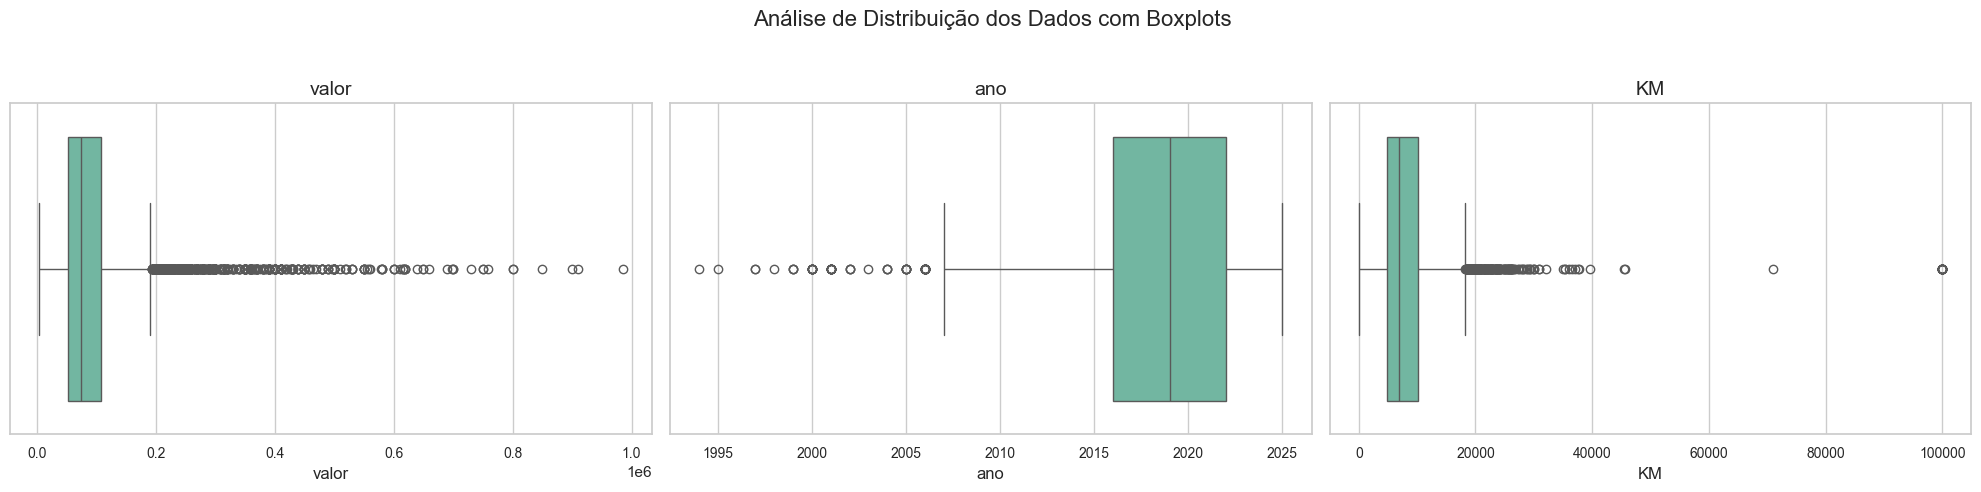

In [245]:
# ---- Analisando distribuição dos dados usando um BOXPLOT

# Criando a figura com subplots
fig, axes = plt.subplots(1, len(col_n), figsize=(20, 5))
# Definindo a paleta de cores
palette = sns.color_palette("Set2")

# Iterando sobre as colunas numéricas para criar boxplots horizontais
for i, col in enumerate(col_n):
    sns.boxplot(x=df_tratado[col], ax=axes[i], palette=palette)
    axes[i].set_title(f'{col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

# Adicionando um título principal à figura
plt.suptitle('Análise de Distribuição dos Dados com Boxplots', fontsize=16)

# Ajustando o layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### NORMALIZANDO OS DADOS COM LOG

In [246]:
df_tratado.loc[:,'VALOR_LOG'] = np.log(df_tratado['valor'])
df_tratado.loc[:,'KM_LOG']  = np.log(df_tratado['KM'])
df_tratado.loc[:,'ANO_LOG'] = np.log(df_tratado['ano'])

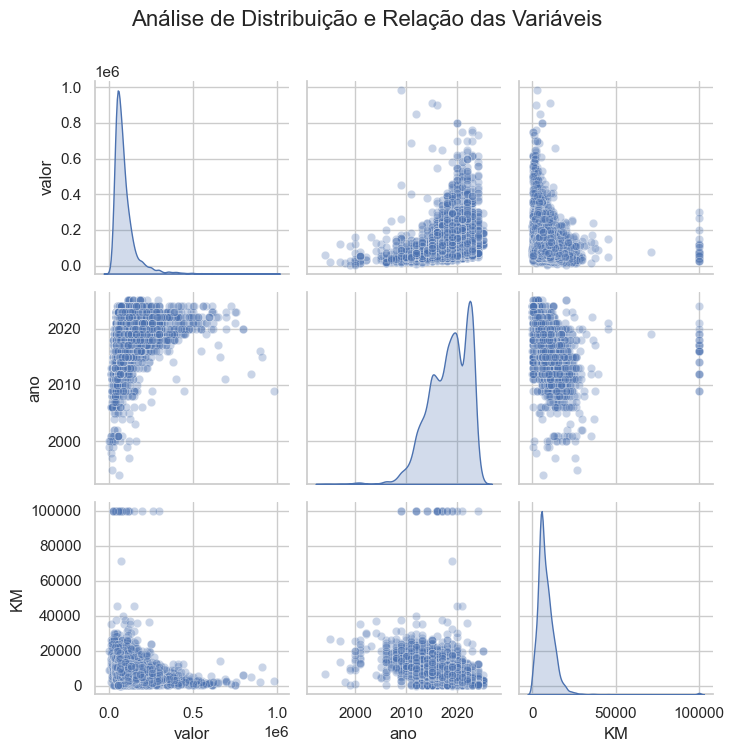

In [247]:
#------ Analisando a distribuição e relação de todas as variáveis.
col_n = ['valor','ano','KM']
# Criando o pairplot com seaborn
sns.pairplot(df_tratado[col_n], diag_kind='kde', plot_kws={'alpha':0.3}, diag_kws={'shade':True})
# Adicionando um título principal
plt.suptitle('Análise de Distribuição e Relação das Variáveis', y=1, fontsize=16)
# Ajustando o layout
plt.tight_layout()
plt.show()

### ANÁLISE VARIÁVEIS DISCRETAS


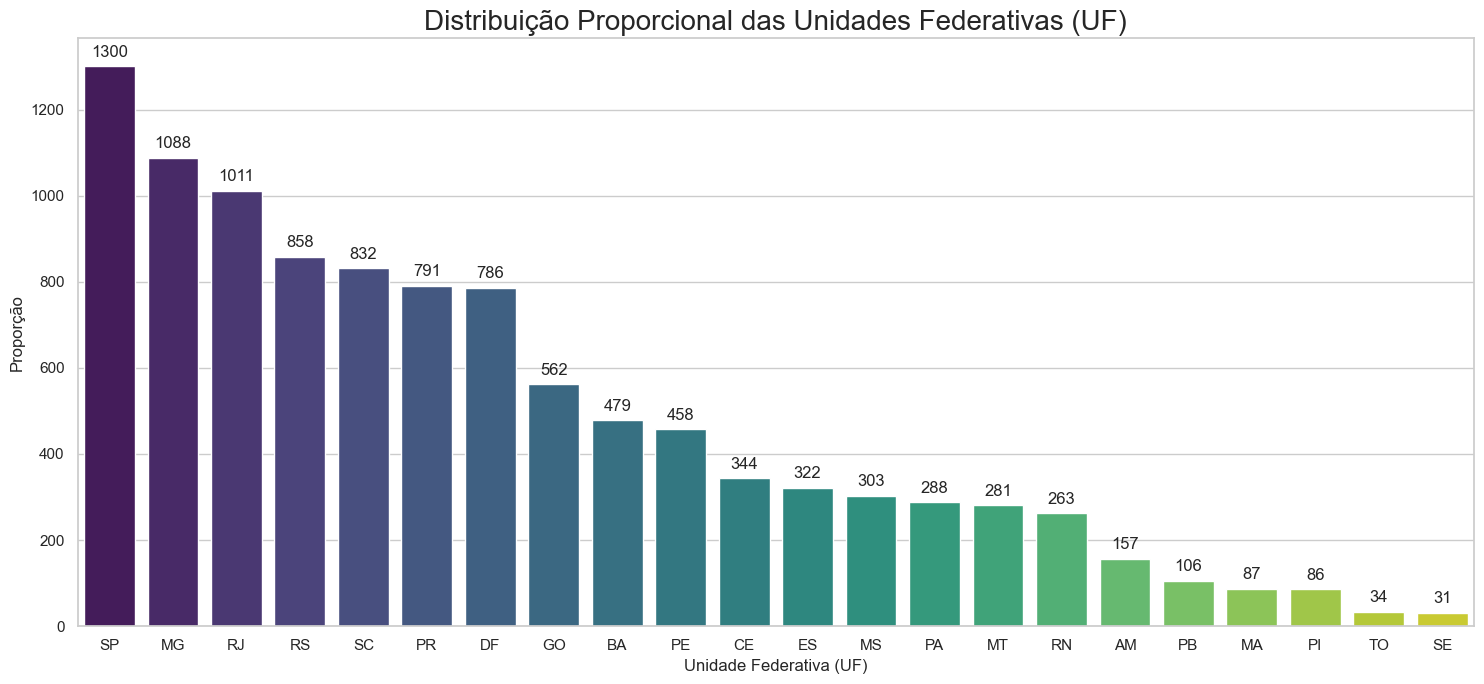

In [248]:
# --------------------------------------- Analisando distribuição por UF

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Contar a frequência normalizada dos valores na coluna 'uf'
uf_counts = df_tratado['uf'].value_counts().reset_index()
uf_counts.columns = ['uf', 'proportion']

# Plotar o gráfico de barras usando Seaborn
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='uf', y='proportion', data=uf_counts, palette='viridis')

# Adicionar título e rótulos aos eixos
plt.title('Distribuição Proporcional das Unidades Federativas (UF)', fontsize= 20)
plt.xlabel('Unidade Federativa (UF)')
plt.ylabel('Proporção')

# Adicionar legendas de valores nas barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


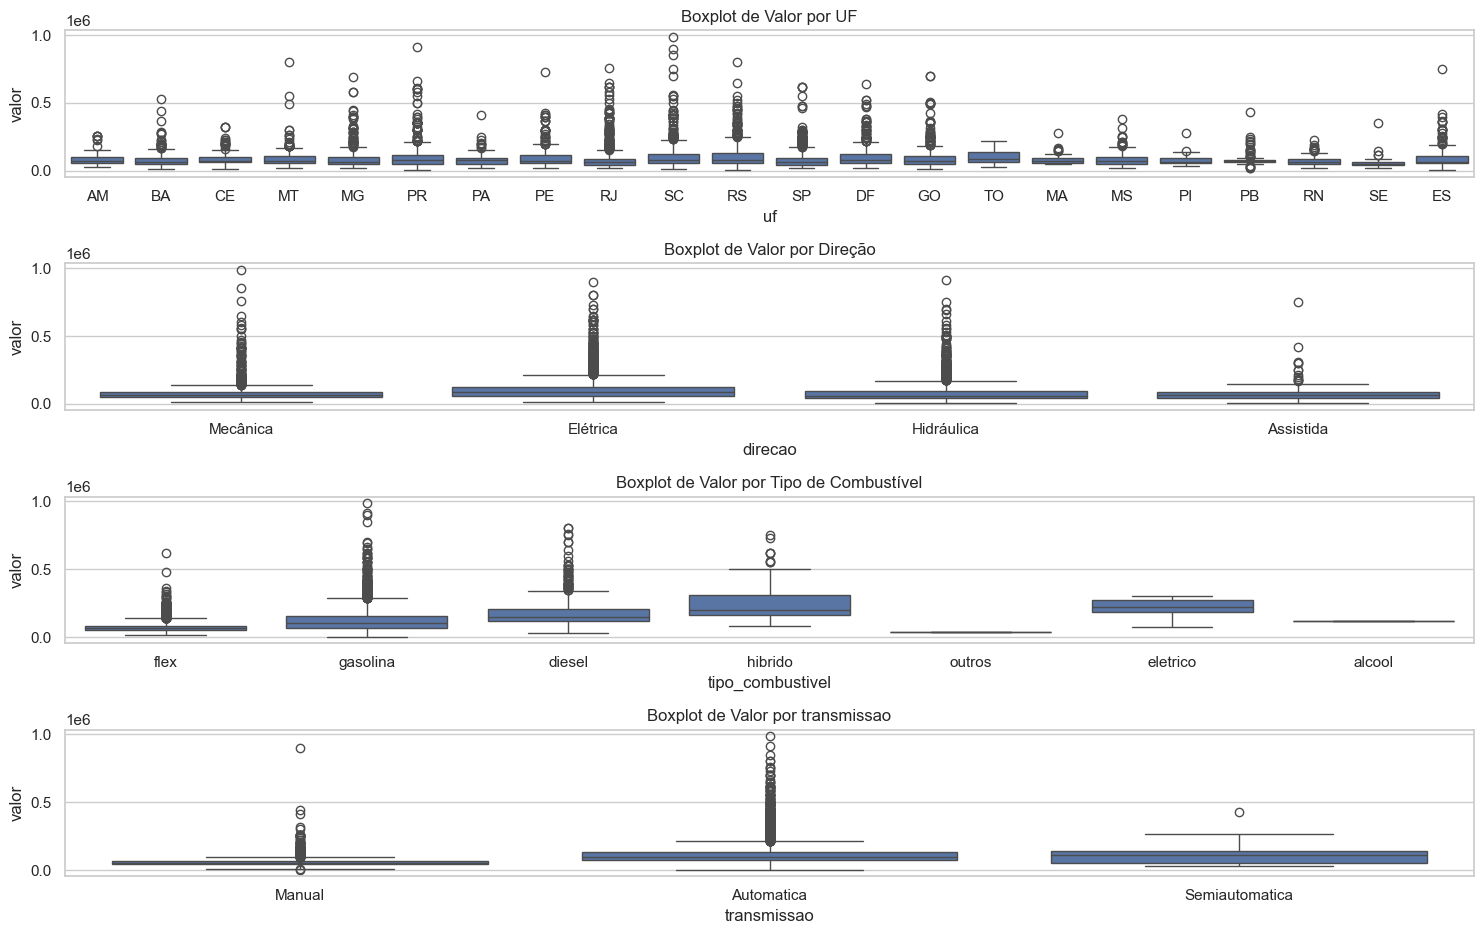

In [249]:
# Configuração dos subplots
fig, axs = plt.subplots(4, 1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
# Gráfico de boxplot para 'uf'
sns.boxplot(x='uf', y='valor', data=df_tratado, ax=axs[0])
axs[0].set_title('Boxplot de Valor por UF')
# Gráfico de boxplot para 'direcao'
sns.boxplot(x='direcao', y='valor', data=df_tratado, ax=axs[1])
axs[1].set_title('Boxplot de Valor por Direção')
# Gráfico de boxplot para 'tipo_combustivel'
sns.boxplot(x='tipo_combustivel', y='valor', data=df_tratado, ax=axs[2])
axs[2].set_title('Boxplot de Valor por Tipo de Combustível')
# Gráfico de boxplot para 'transmissao'
sns.boxplot(x='transmissao', y='valor', data=df_tratado, ax=axs[3])
axs[3].set_title('Boxplot de Valor por transmissao')
# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
# Exibir os gráficos
plt.show()

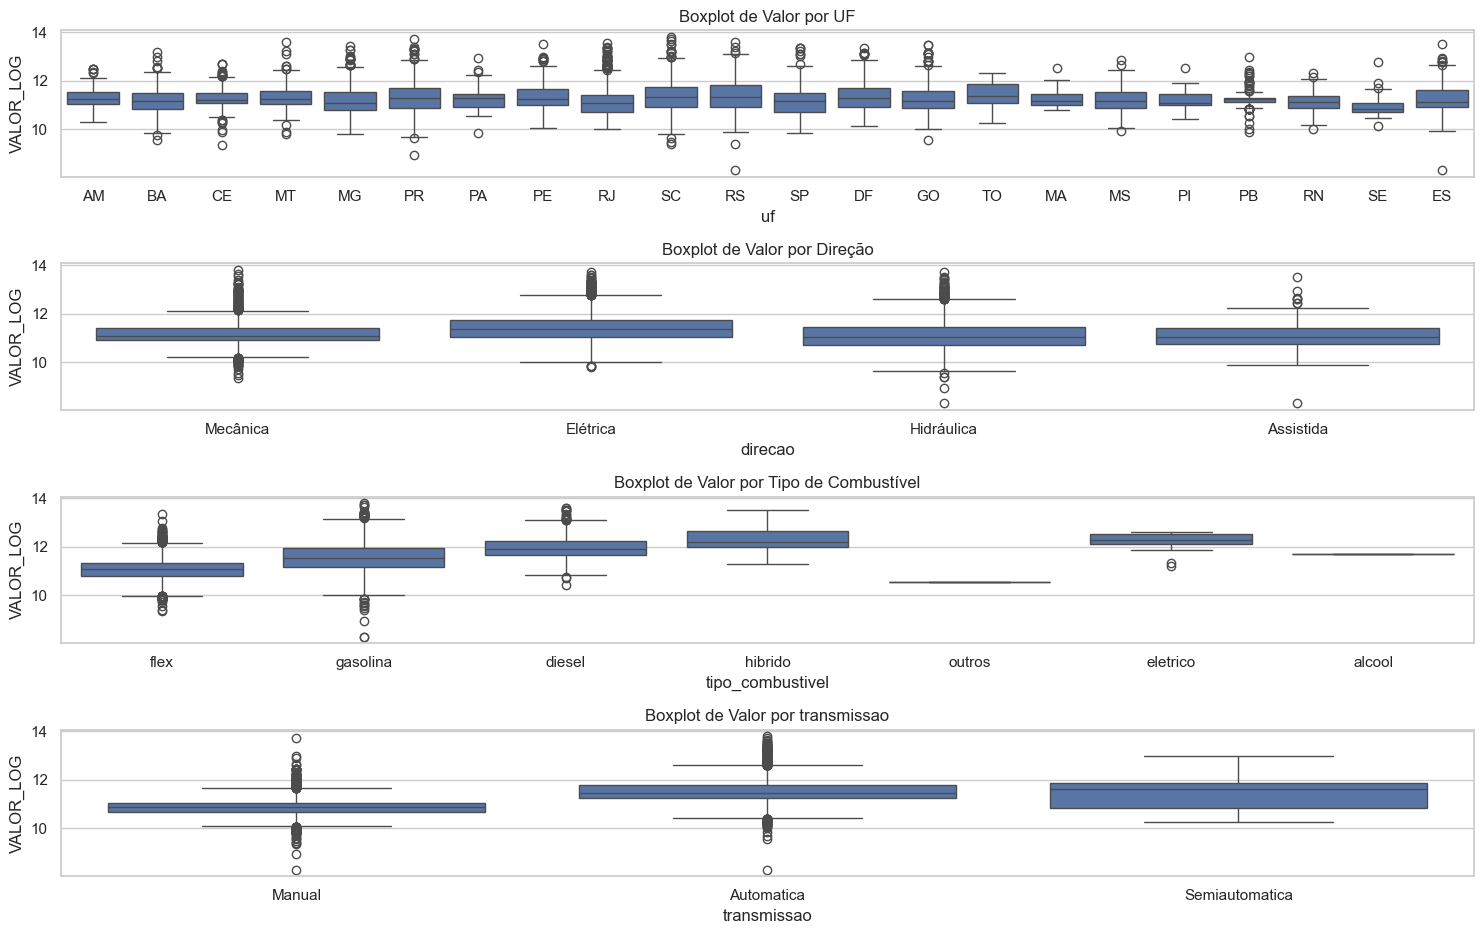

In [250]:
# Configuração dos subplots
fig, axs = plt.subplots(4, 1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
# Gráfico de boxplot para 'uf'
sns.boxplot(x='uf', y='VALOR_LOG', data=df_tratado, ax=axs[0])
axs[0].set_title('Boxplot de Valor por UF')
# Gráfico de boxplot para 'direcao'
sns.boxplot(x='direcao', y='VALOR_LOG', data=df_tratado, ax=axs[1])
axs[1].set_title('Boxplot de Valor por Direção')
# Gráfico de boxplot para 'tipo_combustivel'
sns.boxplot(x='tipo_combustivel', y='VALOR_LOG', data=df_tratado, ax=axs[2])
axs[2].set_title('Boxplot de Valor por Tipo de Combustível')
# Gráfico de boxplot para 'transmissao'
sns.boxplot(x='transmissao', y='VALOR_LOG', data=df_tratado, ax=axs[3])
axs[3].set_title('Boxplot de Valor por transmissao')

# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
# Exibir os gráficos
plt.show()

#### TRANSFORMANDO VARIÁVEIS DISCRETAS



In [251]:
# tratando as colunas vidros_eletricos e ar_condicionado

# Ajustando nomes 
lista_map_ar_condicionado = {
    'Sim': 1,
    'Não': 0,
}
lista_map_vidros_eletricos = {
    'Sim': 1,
    'Não': 0,
}
df_tratado['vidros_eletricos'] = df_tratado['vidros_eletricos'].map(lista_map_ar_condicionado)
df_tratado['ar_condicionado'] = df_tratado['ar_condicionado'].map(lista_map_vidros_eletricos)
df_tratado

,marca,modelo,valor,ano,KM,tipo_combustivel,transmissao,motor,ar_condicionado,cor,portas,direcao,vidros_eletricos,local,uf,link,data_coleta,VALOR_LOG,KM_LOG,ANO_LOG
0,volkswagen,Voyage 1.0 MPI (Flex),59150.0,2023.0,5436.0,flex,Manual,1.0,1,Preto,4.0,Mecânica,1,Manaus,AM,https://carro.mercadolivre.com.br/MLB-37147346...,2024-06-23 00:00:00,10.987832,8.600799,7.612337
1,volkswagen,Gol 1.0 12v (Flex),56400.0,2023.0,3980.0,flex,Manual,1.0,1,Branco,4.0,Mecânica,1,Manaus,AM,https://carro.mercadolivre.com.br/MLB-37469124...,2024-06-23 00:00:00,10.940224,8.289037,7.612337
2,volkswagen,Jetta 1.4 250 Tsi Comfortline,112700.0,2020.0,3857.0,flex,Automatica,1.4,1,Branco,4.0,Elétrica,1,Manaus,AM,https://carro.mercadolivre.com.br/MLB-47465682...,2024-06-23 00:00:00,11.632485,8.257645,7.610853
3,volkswagen,Voyage 1.0 MPI (Flex),59220.0,2023.0,4900.0,flex,Manual,1.0,1,Branco,4.0,Mecânica,1,Manaus,AM,https://carro.mercadolivre.com.br/MLB-37492646...,2024-06-23 00:00:00,10.989015,8.496990,7.612337
4,volkswagen,Up! Up Move Mb,49900.0,2017.0,8210.0,flex,Manual,1.0,1,Prateado,4.0,Elétrica,1,Lauro de Freitas,BA,https://carro.mercadolivre.com.br/MLB-46940075...,2024-06-23 00:00:00,10.817776,9.013108,7.609367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10481,volvo,XC90 2.0 T8 Inscription Expression Recharge (p...,358000.0,2022.0,3800.0,hibrido,Automatica,2.0,1,Cinza-escuro,5.0,Elétrica,0,Itapoã - Vila Velha,ES,https://carro.mercadolivre.com.br/MLB-36463082...,2024-06-23 00:00:00,12.788288,8.242756,7.611842
10482,volvo,V40 2.0 T4 Momentum Drive-e 5p,113900.0,2019.0,2500.0,gasolina,Automatica,2.0,1,Preto,5.0,Elétrica,1,Itapoã - Vila Velha,ES,https://carro.mercadolivre.com.br/MLB-36890784...,2024-06-23 00:00:00,11.643076,7.824046,7.610358
10483,volvo,XC60 2.0 T8 Inscription Drive-e 5p Hibrido 8 m...,199999.0,2021.0,5054.0,hibrido,Automatica,2.0,1,Azul,5.0,Elétrica,0,Itapoã - Vila Velha,ES,https://carro.mercadolivre.com.br/MLB-36986592...,2024-06-23 00:00:00,12.206068,8.527935,7.611348
10484,volvo,V60 2.0 T5 Momentum,159900.0,2019.0,6140.0,gasolina,Automatica,2.0,1,PRATA,4.0,Elétrica,0,Colatina,ES,https://carro.mercadolivre.com.br/MLB-47800351...,2024-06-23 00:00:00,11.982304,8.722580,7.610358


In [252]:
df_dummy = pd.get_dummies(df_tratado[['tipo_combustivel', 'direcao', 'transmissao']], 
                          prefix= '', 
                          prefix_sep='')
# Convertendo valores booleanos para inteiros
df_dummy = df_dummy.astype(int)

df_dummy


,alcool,diesel,eletrico,flex,gasolina,hibrido,outros,Assistida,Elétrica,Hidráulica,Mecânica,Automatica,Manual,Semiautomatica
0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4,0,0,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10481,0,0,0,0,0,1,0,0,1,0,0,1,0,0
10482,0,0,0,0,1,0,0,0,1,0,0,1,0,0
10483,0,0,0,0,0,1,0,0,1,0,0,1,0,0
10484,0,0,0,0,1,0,0,0,1,0,0,1,0,0


### Salvando dados finais

In [253]:
df_final = pd.concat([df_tratado[['marca','modelo', 'uf','vidros_eletricos','ar_condicionado','valor', 'VALOR_LOG', 'KM','KM_LOG','ano','ANO_LOG', 'motor']],
                                df_dummy],axis=1)


data_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data', 'data_tratados.parquet'))
df_final.to_parquet(data_path, index=False)

* Verificando a Correlação das Variáveis

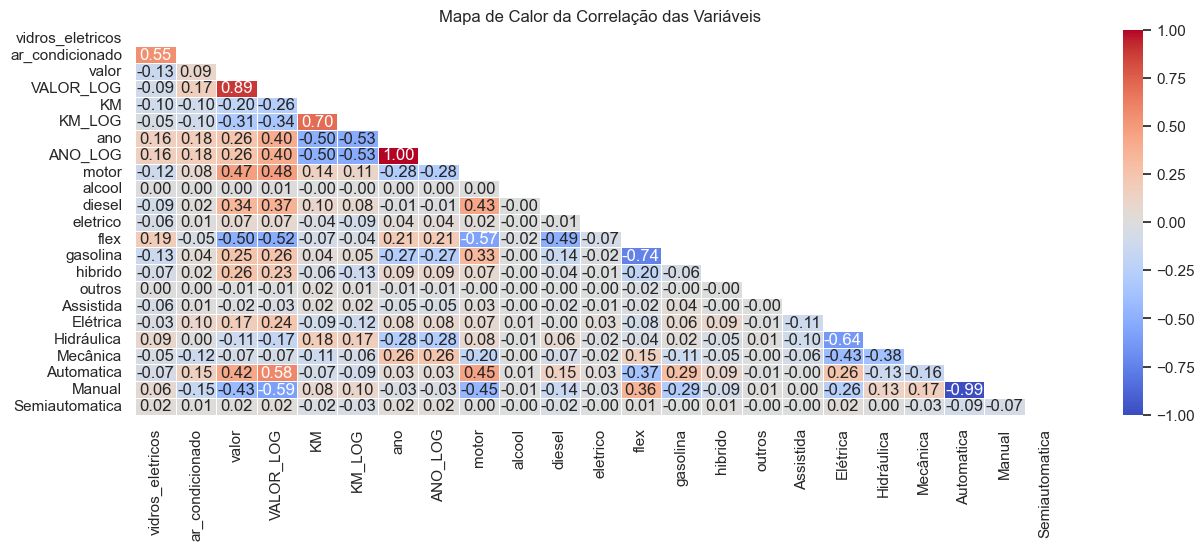

In [254]:
# Verificando a Correlação das Variáveis
x = df_final.copy()
x = x.drop(columns=['marca','uf','modelo'])
corr = x.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Configurando o tamanho da figura
plt.figure(figsize=(15, 5))
# Plotando a matriz de correlação usando seaborn
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, mask=mask, vmax=1, vmin=-1)
plt.title('Mapa de Calor da Correlação das Variáveis')
plt.grid(False)
plt.show()